In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
pd.options.display.float_format = '{:,.2f}'.format

**Read Dataset**

In [2]:
census_data=pd.read_csv('IncomeCensus.csv')

In [3]:
census_data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,above-50k
22469,45,Federal-gov,368947,Bachelors,13,Never-married,Protective-serv,Not-in-family,Black,Female,0,0,40,United-States,<=50K
39917,46,Private,235334,Masters,14,Married-civ-spouse,Exec-managerial,Husband,Black,Male,99999,0,60,United-States,>50K
23164,59,Private,147989,Some-college,10,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,50,United-States,>50K
34319,56,Private,133876,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
6685,19,Private,283945,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,25,United-States,<=50K
33854,30,Private,242739,Bachelors,13,Divorced,Sales,Own-child,White,Female,0,0,40,United-States,<=50K
46437,35,Private,189251,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Female,0,0,40,Iran,<=50K
27153,33,Private,170148,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,45,United-States,<=50K
22896,19,Private,126501,11th,7,Never-married,Adm-clerical,Own-child,Amer-Indian-Eskimo,Female,0,0,15,South,<=50K
43668,21,Private,97214,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,35,United-States,<=50K


**Data Cleanup**

In [4]:
#clean up
#Removing leading/trailing spaces
census_data_string_cols = census_data.select_dtypes(['object'])
census_data[census_data_string_cols.columns] = census_data_string_cols.apply(lambda x: x.str.strip())

In [74]:
%pip install deepchecks --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 69.4 MB/s eta 0:00:00
  Created wheel for PyNomaly: filename=PyNomaly-0.3.3-py3-none-any.whl size=8497 sha256=ab5f84fbe4f63e4b7b806451aab39d5443d818f2ca0825f745c6e97660dc4560
  Stored in directory: /root/.cache/pip/wheels/72/c2/79/a077f8b4ef4549086016b0202e61193518262377b6d23318b1
Successfully built PyNomaly


In [6]:
census_data['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [75]:
from deepchecks.tabular.checks import SpecialCharacters
#Checking any special characters in columns
SpecialCharacters().run(census_data)

deepchecks - WARNING - Received a "pandas.DataFrame" instance. It is recommended to pass a "deepchecks.tabular.Dataset" instance by initializing it with the data and metadata, for example by doing "Dataset(dataframe, label=label, cat_features=cat_features)"
deepchecks - WARNING - It is recommended to initialize Dataset with categorical features by doing "Dataset(df, cat_features=categorical_list)". No categorical features were passed, therefore heuristically inferring categorical features in the data. 10 categorical features were inferred.: workclass, education, education-num, marital-status, occupation, relationship, race... For full list use dataset.cat_features


<!--
 ~ ----------------------------------------------------------------------------
 ~ Copyright (C) 2021-2023 Deepchecks (https://www.deepchecks.com)
 ~
 ~ This file is part of Deepchecks.
 ~ Deepchecks is distributed under the terms of the GNU Affero General
 ~ Public License (version 3 or later).
 ~ You should have received a copy of the GNU Affero General Public License
 ~ along with Deepchecks. If not, see .
 ~ ----------------------------------------------------------------------------
 ~
-->
<!DOCTYPE html>
 
 
 
 Special Characters

<Axes: xlabel='hours-per-week'>

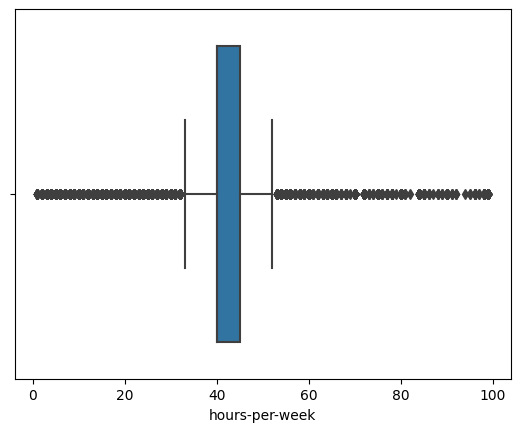

In [7]:
sns.boxplot(data=census_data,x='hours-per-week')

<Axes: xlabel='age'>

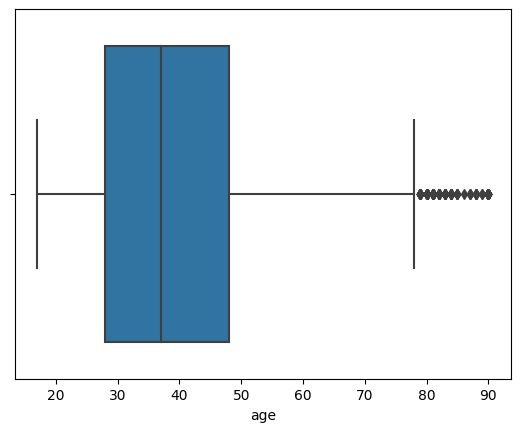

In [8]:
sns.boxplot(data=census_data,x='age')

In [9]:
#Encoding some columns
label_encoder = preprocessing.LabelEncoder()
census_data['above-50k']=label_encoder.fit_transform(census_data['above-50k'])
census_data['sex']=label_encoder.fit_transform(census_data['sex'])
#Removing outliers
index_hoursgr70 = census_data[census_data['hours-per-week'] > 70].index
census_data.drop(index_hoursgr70,inplace=True)

index_questionmark = census_data[census_data['workclass']=='?'].index
census_data.drop(index_questionmark,inplace=True)

index_questionmark_occuptn = census_data[census_data['occupation']=='?'].index
census_data.drop(index_questionmark_occuptn,inplace=True)

In [10]:
census_data['above-50k'].value_counts(normalize=True)

0   0.75
1   0.25
Name: above-50k, dtype: float64

In [11]:
#from deepchecks.tabular.checks import SpecialCharacters
#Checking any special characters in columns
#SpecialCharacters().run(census_data)

**Shape Data**

In [12]:
feature_columns=census_data.columns
feature_columns=feature_columns.drop(['above-50k','education','workclass','native-country'])

In [13]:
X=pd.get_dummies(census_data[feature_columns])
y=census_data[['above-50k']]

**Starting with Logistic Regression**

In [14]:
%%time 

from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

algo = LogisticRegression(max_iter=500)

cv_results = cross_validate(estimator= algo, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)

CPU times: user 129 ms, sys: 113 ms, total: 242 ms
Wall time: 5.76 s


In [15]:
cv_results
#Data is imbalanced as Class 0 is nearly 76 %. As data is imbalanced, we can't rely on both accuracy, auc, hence we need to see f1 here, it is 50%. We need to improve this. 

{'fit_time': array([1.04856825, 1.14959478, 0.65684128, 0.46995282, 0.58936119]),
 'score_time': array([0.07657695, 0.14794326, 0.07502365, 0.06642652, 0.04234171]),
 'estimator': [LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500),
  LogisticRegression(max_iter=500)],
 'test_accuracy': array([0.79172185, 0.79304636, 0.79172185, 0.79536424, 0.79501049]),
 'train_accuracy': array([0.79298546, 0.79290267, 0.79337178, 0.79204724, 0.79682671]),
 'test_precision': array([0.70609319, 0.71326165, 0.70808203, 0.72803851, 0.63537906]),
 'train_precision': array([0.71266766, 0.71497585, 0.71122838, 0.71402214, 0.6369839 ]),
 'test_recall': array([0.26478495, 0.26747312, 0.26299283, 0.27093596, 0.39426523]),
 'train_recall': array([0.26777915, 0.26520327, 0.27169896, 0.26008065, 0.40777243]),
 'test_f1': array([0.38514174, 0.38905181, 0.38353479, 0.39490862, 0.4865911 ]),
 'train_f1': array([0.38928688, 0.38

**With Decision Tree Classifier**

In [16]:
%%time 

from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
algo = DecisionTreeClassifier()

cv_results = cross_validate(estimator= algo, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)

CPU times: user 74.2 ms, sys: 46.4 ms, total: 121 ms
Wall time: 2.08 s


In [17]:
cv_results

{'fit_time': array([0.48160434, 0.48873472, 0.42838597, 0.446244  , 0.290941  ]),
 'score_time': array([0.06946945, 0.07056141, 0.08465457, 0.07421947, 0.04558802]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_accuracy': array([0.81236203, 0.80662252, 0.81313466, 0.8080574 , 0.80417265]),
 'train_accuracy': array([0.99988962, 0.99983443, 0.99983443, 0.99986203, 0.99983444]),
 'test_precision': array([0.61697449, 0.60572687, 0.61887958, 0.60564585, 0.59853701]),
 'train_precision': array([1., 1., 1., 1., 1.]),
 'test_recall': array([0.62858423, 0.61603943, 0.62858423, 0.6341245 , 0.62320789]),
 'train_recall': array([0.99955202, 0.99932803, 0.99932803, 0.99943996, 0.99932803]),
 'test_f1': array([0.62272526, 0.61083963, 0.62369415, 0.61955808, 0.61062335]),
 'train_f1': array([0.99977596, 0.9996639 , 0.9996639 , 0.9997199 , 0.9996639 ]),
 'test_roc_auc': array([0.75065167

In [18]:
results_f1_diff = []
results_f1_test = []
results_accuracy = []
results_accuracy_diff = []
names = []

**With Random Forest**

In [19]:
%%time 

from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

algo = RandomForestClassifier()

cv_results_rfbasic = cross_validate(estimator= algo, 
                            X=X, 
                            y=y, 
                            cv=5, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=True,
                            n_jobs= -1)

CPU times: user 624 ms, sys: 1.05 s, total: 1.67 s
Wall time: 34.3 s


In [20]:
cv_results_rfbasic

{'fit_time': array([7.41355968, 7.36484599, 8.64184999, 9.91955042, 4.65834737]),
 'score_time': array([1.45183349, 1.4552393 , 1.95566416, 0.74600339, 0.53876185]),
 'estimator': [RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier(),
  RandomForestClassifier()],
 'test_accuracy': array([0.84878587, 0.84602649, 0.85728477, 0.84779249, 0.85009383]),
 'train_accuracy': array([0.99988962, 0.99977924, 0.99975165, 0.99983443, 0.99977925]),
 'test_precision': array([0.72974414, 0.71830986, 0.75066738, 0.72078594, 0.72595657]),
 'train_precision': array([0.99988798, 0.99977591, 1.        , 0.99988794, 0.99932833]),
 'test_recall': array([0.61335125, 0.61693548, 0.62992832, 0.62427228, 0.62903226]),
 'train_recall': array([0.99966402, 0.99932803, 0.99899205, 0.99943996, 0.99977601]),
 'test_f1': array([0.66650438, 0.6637744 , 0.68501827, 0.66906647, 0.67402784]),
 'train_f1': array([0.99977599, 0.99955192, 0.99949577, 0.9996639 , 0.999552

In [21]:
results_f1_diff.append((cv_results_rfbasic['train_f1'].mean()*100)-(cv_results_rfbasic['test_f1'].mean()*100))
results_f1_test.append(cv_results_rfbasic['test_f1'].mean()*100)
results_accuracy.append(cv_results_rfbasic['test_accuracy'].mean()*100)
results_accuracy_diff.append((cv_results_rfbasic['train_accuracy'].mean()*100)-(cv_results_rfbasic['test_accuracy'].mean()*100))
names.append('RF Basic')

**Findout best features and best hyper parameters**

In [22]:
%%time 

from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif,chi2

#Used chi2 test to select best K features
pipe = Pipeline([('selector', SelectKBest(chi2, k=20)),
                 ('classifier', LogisticRegression())])

search_space = [{'classifier': [LogisticRegression(solver='lbfgs')],
                 'classifier__C': [0.01, 0.1, 1.0]},
                {'classifier': [RandomForestClassifier()],
                 'classifier__max_depth': [5, 10, None],
                 'classifier__n_estimators': [100,200,300]}
                ]
clf = GridSearchCV(pipe, search_space, cv=5,scoring='accuracy',return_train_score=True,n_jobs = -1)

clf = clf.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


CPU times: user 4.67 s, sys: 693 ms, total: 5.37 s
Wall time: 4min 19s


In [23]:
print ("best model", clf.best_estimator_)
print("best parameters", clf.best_params_)
print("best score: ", clf.best_score_)

best model Pipeline(steps=[('selector',
                 SelectKBest(k=20,
                             score_func=<function chi2 at 0x7f341c66a940>)),
                ('classifier', RandomForestClassifier(max_depth=10))])
best parameters {'classifier': RandomForestClassifier(max_depth=10), 'classifier__max_depth': 10, 'classifier__n_estimators': 100}
best score:  0.8590697943601026


In [24]:
%%time 

cv_results = cross_validate(estimator= clf.best_estimator_, 
                            X=X, 
                            y=y, 
                            cv=10, 
                            scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
                            return_train_score=True,
                            return_estimator=False,
                            n_jobs= -1)

CPU times: user 221 ms, sys: 31.5 ms, total: 253 ms
Wall time: 32.6 s


In [25]:
cv_results
results_f1_diff.append((cv_results['train_f1'].mean()*100)-(cv_results['test_f1'].mean()*100))
results_f1_test.append(cv_results['test_f1'].mean()*100)
results_accuracy.append(cv_results['test_accuracy'].mean()*100)
results_accuracy_diff.append((cv_results['train_accuracy'].mean()*100)-(cv_results['test_accuracy'].mean()*100))
names.append("RF Chi2 Unbalanced")
# Data set is imbalanced, even if we do feature selection with chi square, getting f1 score as low but over fitting is reduced. 
#We can obsere the difference between test and training scores

In [26]:
clf.best_estimator_.named_steps['classifier'].feature_importances_

array([0.06381648, 0.01475631, 0.15804776, 0.0091328 , 0.20039912,
       0.05214031, 0.04132312, 0.00625482, 0.18713163, 0.04341817,
       0.00172089, 0.03061684, 0.00289579, 0.00764838, 0.02768283,
       0.10911472, 0.01127444, 0.01021773, 0.00513882, 0.01726903])

**Trying to oversample and make balanced set**

In [27]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from collections import Counter

In [28]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [29]:
y_over['above-50k'].value_counts()

0    34138
1    34138
Name: above-50k, dtype: int64

In [30]:
steps = [('selector', SelectKBest(chi2, k=20)), ('model', RandomForestClassifier(max_depth=10, n_estimators=200))]
pipeline = Pipeline(steps=steps)
#cv = KFold(n_splits=10, random_state=1)
scores = cross_validate(pipeline, X_over, y_over, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score=True, return_estimator=False, cv=10, n_jobs=-1)

In [31]:
scores
results_f1_diff.append((scores['train_f1'].mean()*100)-(scores['test_f1'].mean()*100))
results_f1_test.append(scores['test_f1'].mean()*100)
results_accuracy.append(scores['test_accuracy'].mean()*100)
results_accuracy_diff.append((scores['train_accuracy'].mean()*100)-(scores['test_accuracy'].mean()*100))
names.append("RF Chi2 After Oversample")

**Trying Logistic with Chi2**

In [51]:
steps = [('selector', SelectKBest(chi2, k=20)), ('model', LogisticRegression(solver='lbfgs'))]
pipeline = Pipeline(steps=steps)
#cv = KFold(n_splits=10, random_state=1)
scores_lr = cross_validate(pipeline, X_over, y_over, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], return_train_score=True, return_estimator=False, cv=10, n_jobs=-1)

In [52]:
scores_lr

results_f1_diff.append((scores_lr['train_f1'].mean()*100)-(scores_lr['test_f1'].mean()*100))
results_f1_test.append(scores_lr['test_f1'].mean()*100)
results_accuracy.append(scores_lr['test_accuracy'].mean()*100)
results_accuracy_diff.append((scores_lr['train_accuracy'].mean()*100)-(scores_lr['test_accuracy'].mean()*100))
names.append("LR With Chi2 After oversample")

In [69]:
df_metrics = pd.DataFrame({"f1_score_diff" : results_f1_diff, "accuracy_diff" : results_accuracy_diff, "f1_score_test" : results_f1_test, "accuracy_test" : results_accuracy, "desc": names})
#df_metrics.sort_values('f1_score_diff', ascending=False)

**Observations:**

In [73]:
df_metrics
#accuracy_diff = difference between test accuracy and train accuracy
#f1_score_diff = difference between test f1 score and train f1 score

,f1_score_diff,accuracy_diff,f1_score_test,accuracy_test,desc
0,32.79,14.98,67.17,85.00,RF Basic
1,1.85,0.76,66.67,85.87,RF Chi2 Unbalanced
2,0.55,0.60,84.69,83.78,RF Chi2 After Oversample
3,0.09,0.06,56.97,61.71,LR With Chi2 After oversample


In [34]:
#I believe, we need some more training data to increase accuracy and some tuning for parameters to increase model performance further.